In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Feature Name Description
# Store = Store number
# Date = Week of Sales
# Weekly_Sales = Sales for the given store in that week
# Holiday_Flag = If it is a holiday week > more sale
# Temperature = Temperature on the day of the sale > less sale
# Fuel_Price = Cost of the fuel in the region > less sale
# CPI = Consumer Price Index ------> in a particular do people have money or not
# Unemployment = Unemployment Rate > less sale

In [ ]:
# 1. You are provided with the weekly sales data for their various outlets. Use statistical
# analysis, EDA, outlier analysis, and handle the missing values to come up with various
# insights that can give them a clear perspective on the following:

#   a. If the weekly sales are affected by the unemployment rate, if yes - which stores
#   are suffering the most?

    # -----> graph between weekly sales or unemployment rate


# b. If the weekly sales show a seasonal trend, when and what could be the reason?

    # -------> using seasonal decompose

# c. Does temperature affect the weekly sales in any manner?

    #  -------> same visualization


# d. How is the Consumer Price index affecting the weekly sales of various stores?

      # --------> same visualization
# e. Top performing stores according to the historical data.

      # -------> use pandas predict which store has high weekley sale


# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

      # -------> use pandas predict which store has less weekley sale and compare

# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

      # -------> use arima sarima model to predict for 12 month



In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.shape

(6435, 8)

In [ ]:
df['Date'].dtype

dtype('O')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'] , dayfirst = True)

In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.duplicated().sum()

np.int64(0)

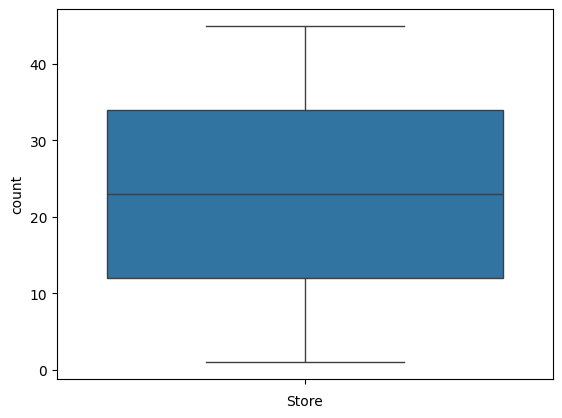

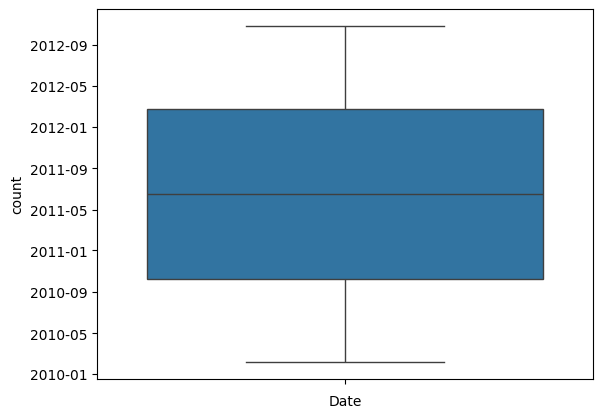

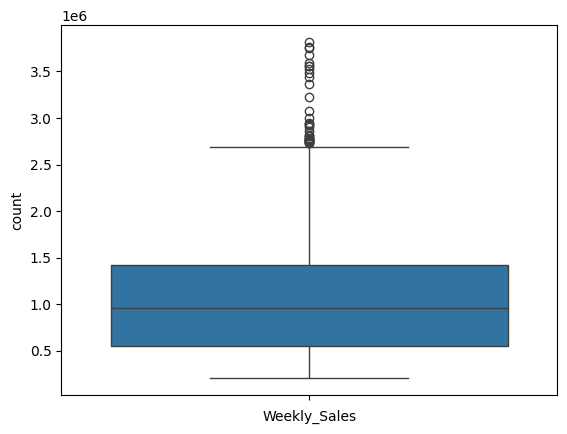

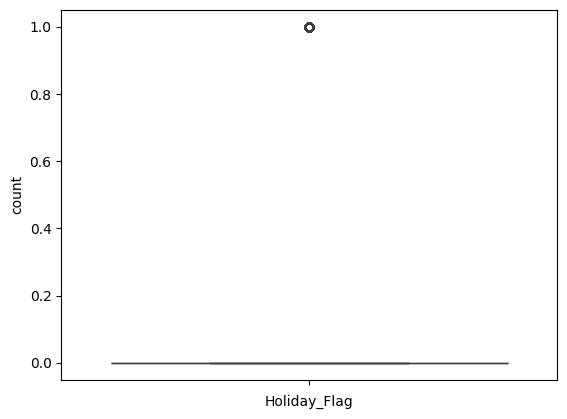

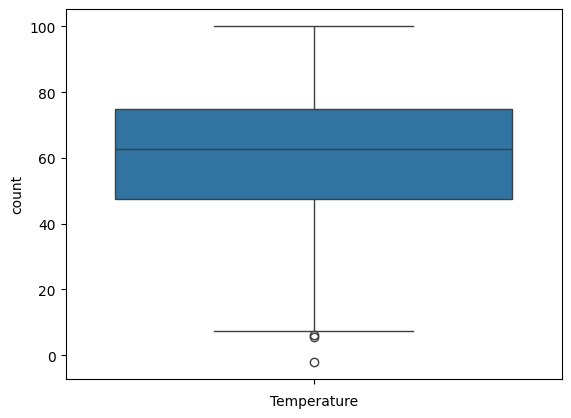

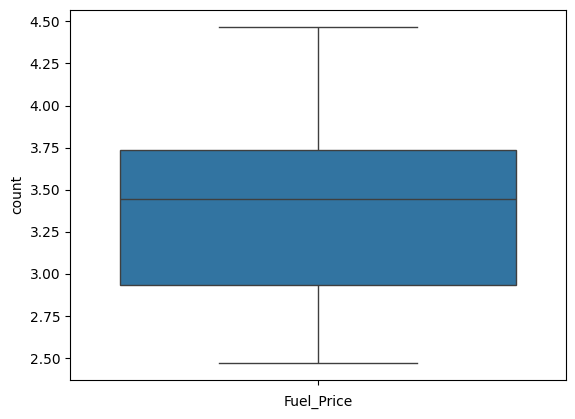

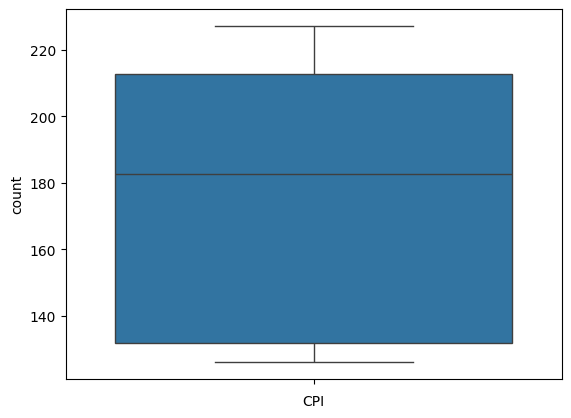

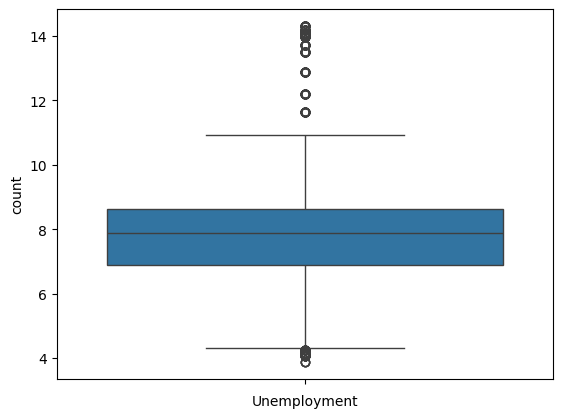

In [ ]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.ylabel('count')
  plt.show()

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
col = ['Weekly_Sales' , 'Unemployment' , 'Temperature' , 'Holiday_Flag']

for i in col:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3 - Q1

  LB = Q1 - 1.5*(IQR)
  UB = Q3 + 1.5*(IQR)

  df = df[(df[i] >= LB) & (df[i] <= UB)]

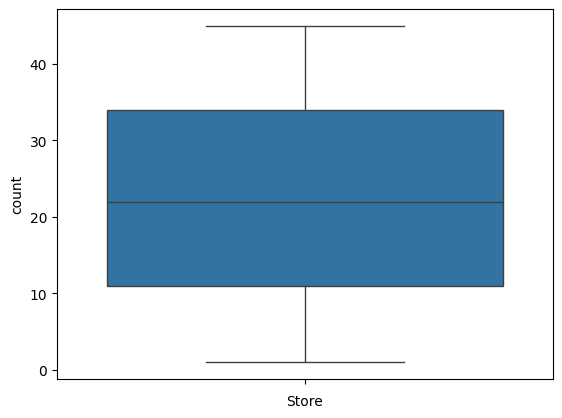

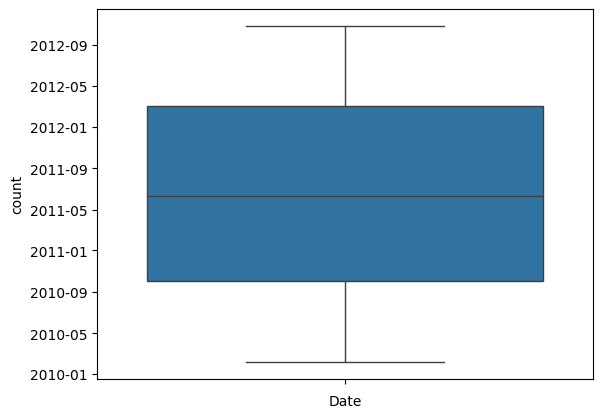

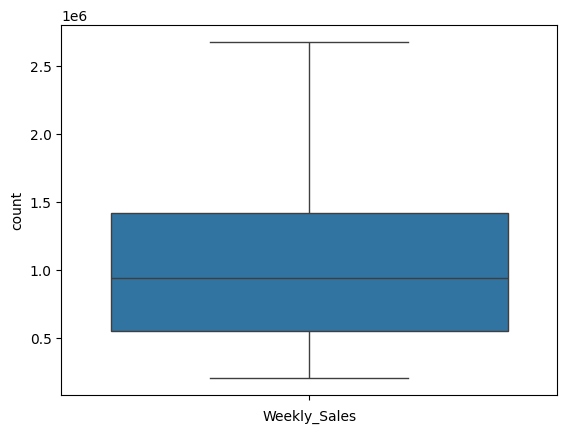

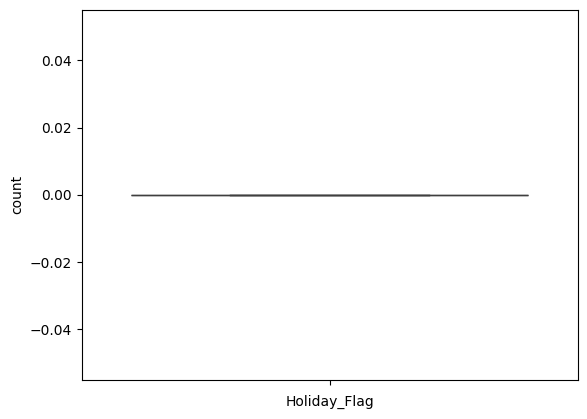

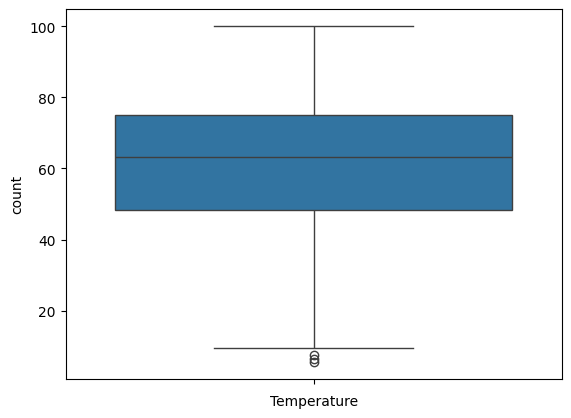

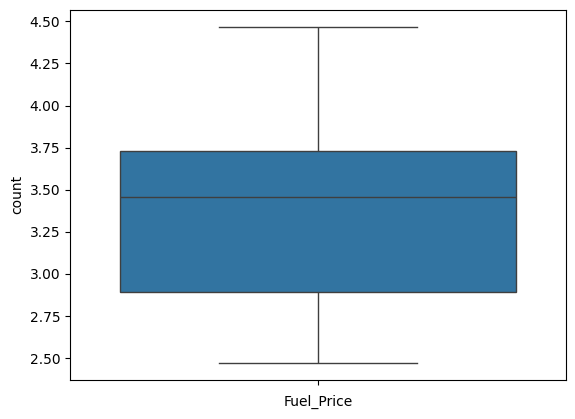

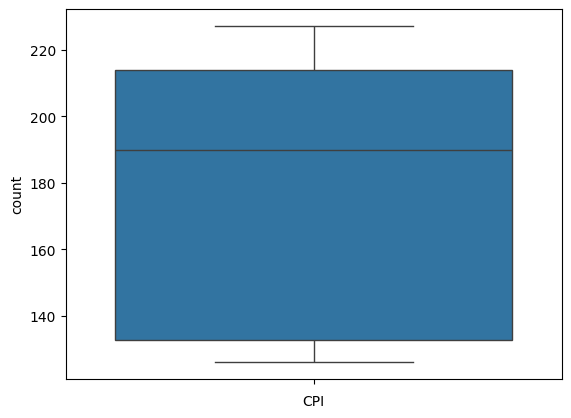

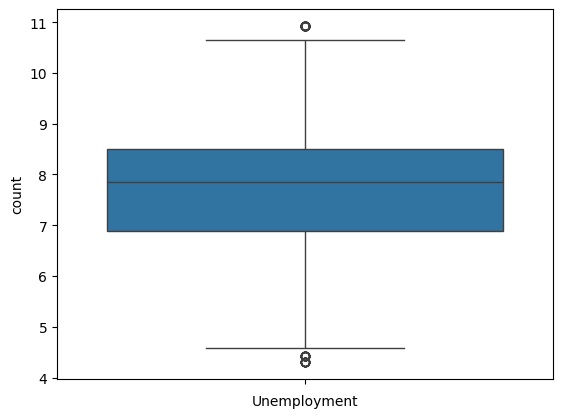

In [ ]:
for i in df:
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.ylabel('count')
  plt.show()

**a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**



In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106


In [ ]:
store = df.groupby(by = 'Store')[['Weekly_Sales' , 'Unemployment']].mean().reset_index()

In [ ]:
store.head()

,Store,Weekly_Sales,Unemployment
0,1,1.546957e+06,7.601722
1,2,1.892591e+06,7.614298
2,3,4.000648e+05,7.171338
3,4,2.036610e+06,6.217681
4,5,3.148923e+05,6.288241


In [ ]:
store.sort_values(by = 'Store' , ascending=False).head()

,Store,Weekly_Sales,Unemployment
44,45,7.821985e+05,8.648571
43,44,3.032536e+05,6.728797
42,43,6.331276e+05,9.929677
41,42,5.555550e+05,8.356917
40,41,1.263101e+06,6.967068


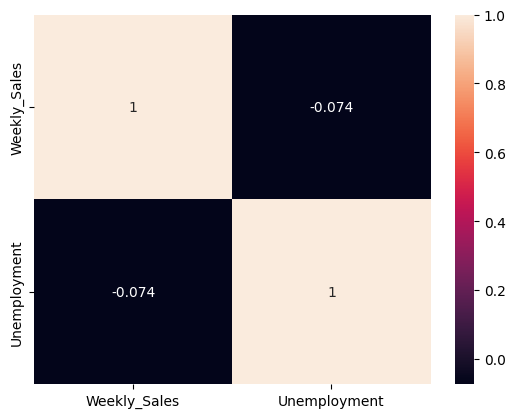

In [ ]:
corr_mat = sns.heatmap(df[['Weekly_Sales' , 'Unemployment']].corr() , annot = True)
plt.show()

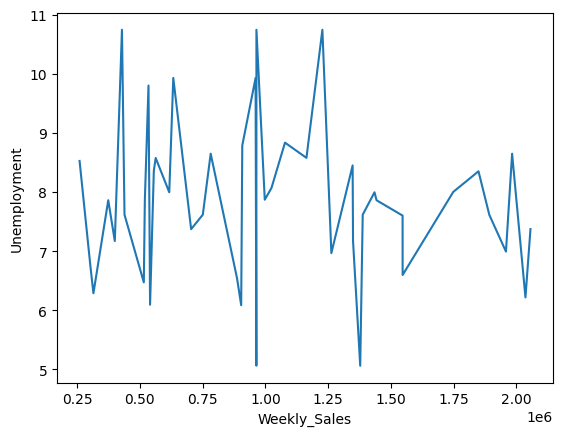

In [ ]:
sns.lineplot(data = store, x = 'Weekly_Sales' , y = 'Unemployment')
plt.show()

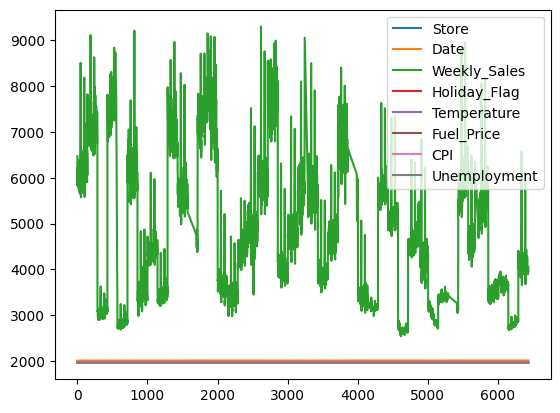

In [ ]:
df.plot()
plt.show()

**b. If the weekly sales show a seasonal trend, when and what could be the reason?**

<function matplotlib.pyplot.show(close=None, block=None)>

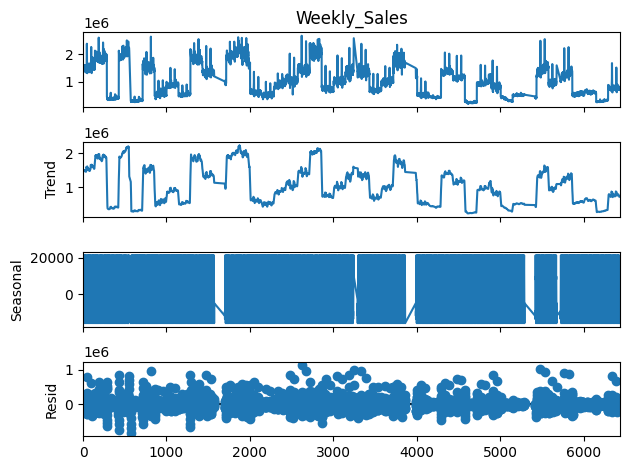

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Trend = seasonal_decompose(df['Weekly_Sales'] , period=12)
Trend.plot()
plt.show

In [ ]:
df.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808
10,1,2010-04-16,1466058.28,0,66.32,2.808,210.488700,7.808


**c. Does temperature affect the weekly sales in any manner?**

In [ ]:
temp = df.groupby(by = 'Weekly_Sales')[['Temperature']].mean().reset_index()

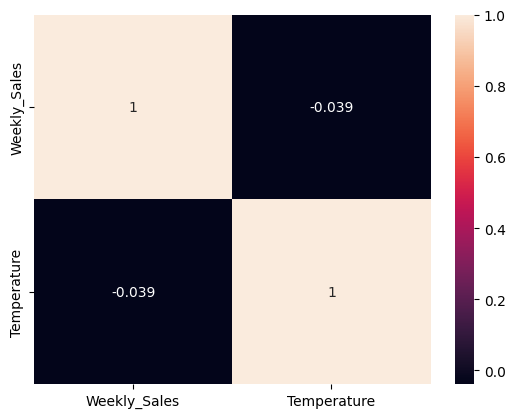

In [ ]:
sns.heatmap(df[['Weekly_Sales','Temperature']].corr() , annot = True)
plt.show()

In [ ]:
df[['Weekly_Sales','Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,-0.038686
Temperature,-0.038686,1.000000


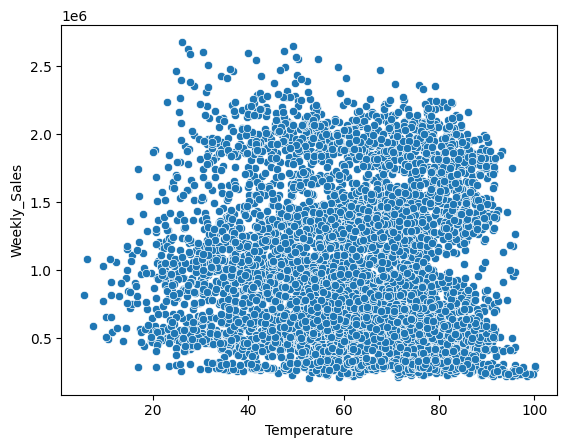

In [ ]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.show()

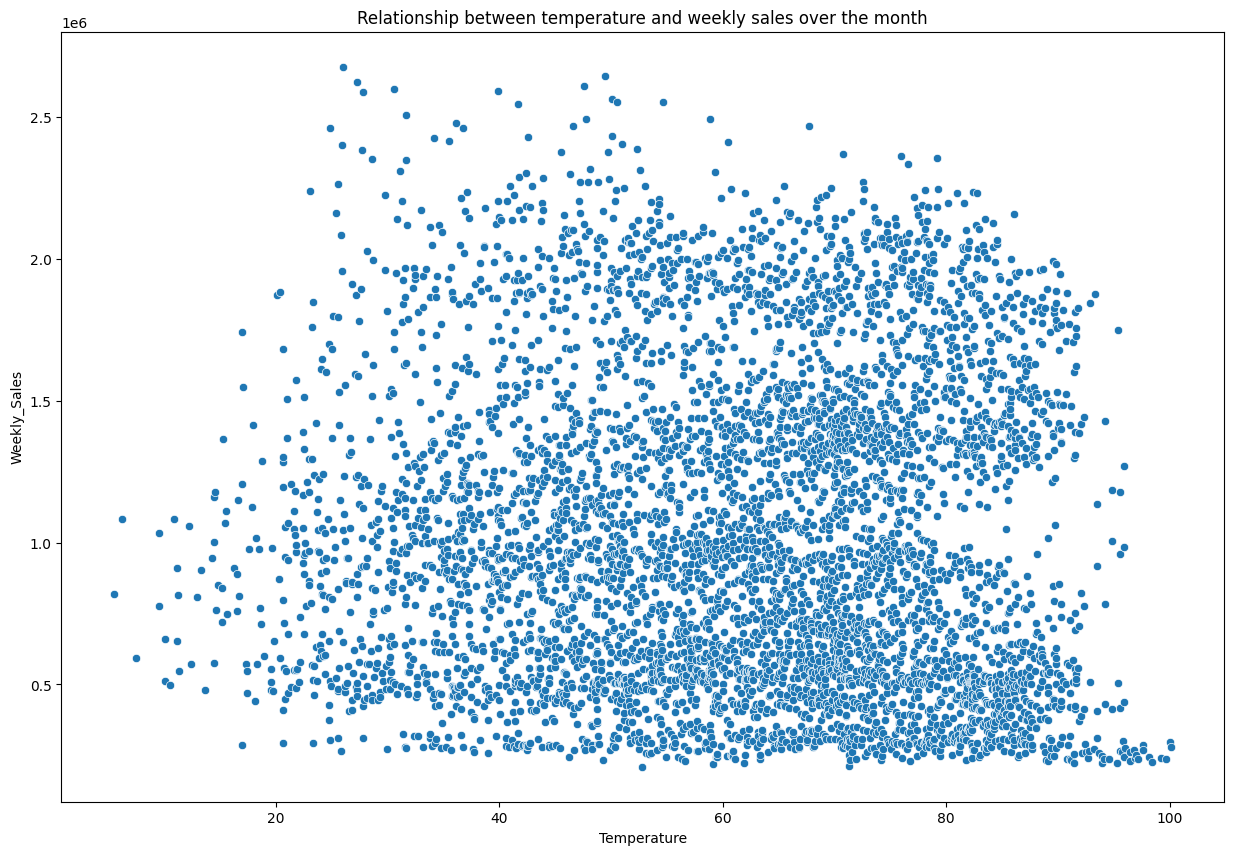

In [ ]:
sorted = df.sort_values(by = 'Temperature')
plt.figure(figsize=(15,10))
sns.scatterplot(data = sorted , x = 'Temperature' , y = 'Weekly_Sales')
plt.title('Relationship between temperature and weekly sales over the month')
plt.show()

**d. How is the Consumer Price index affecting the weekly sales of various stores?**

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106


In [ ]:
cpi_affect = df.groupby(by = 'Store')[['Weekly_Sales' , 'CPI']].mean().reset_index()

In [ ]:
plot = cpi_affect.sort_values(by='Store' , ascending=False).head()
plot

,Store,Weekly_Sales,CPI
44,45,7.821985e+05,186.314614
43,44,3.032536e+05,128.694529
42,43,6.331276e+05,207.767737
41,42,5.555550e+05,128.694529
40,41,1.263101e+06,193.670820


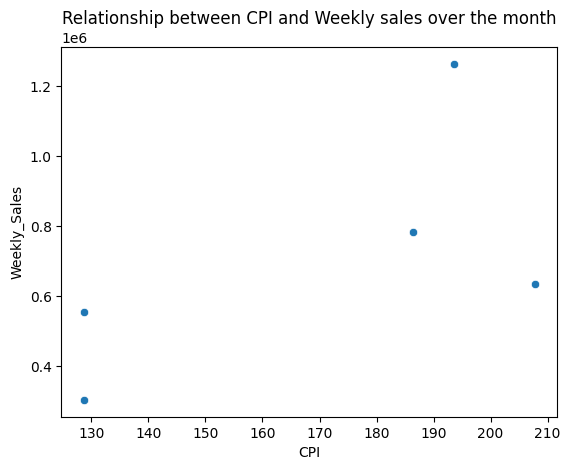

In [ ]:
sns.scatterplot(data = plot , x = 'CPI' , y = 'Weekly_Sales')
plt.title('Relationship between CPI and Weekly sales over the month')
plt.show()

In [ ]:
df[['CPI','Weekly_Sales']].corr()

,CPI,Weekly_Sales
CPI,1.00000,-0.08413
Weekly_Sales,-0.08413,1.00000


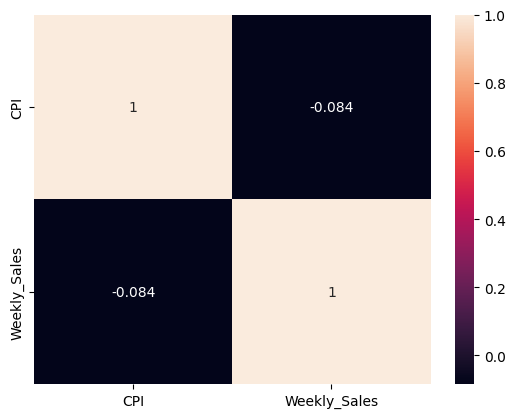

In [ ]:
sns.heatmap(df[['CPI','Weekly_Sales']].corr() , annot = True)
plt.show()

**Top performing stores according to the historical data.**

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106


In [ ]:
top_performance = df.groupby(by = 'Store')['Weekly_Sales'].sum().reset_index()
top_performance.sort_values(by = 'Weekly_Sales' , ascending=False).head()

,Store,Weekly_Sales
19,20,2.632513e+08
13,14,2.578435e+08
12,13,2.527026e+08
1,2,2.479294e+08
9,10,2.404315e+08


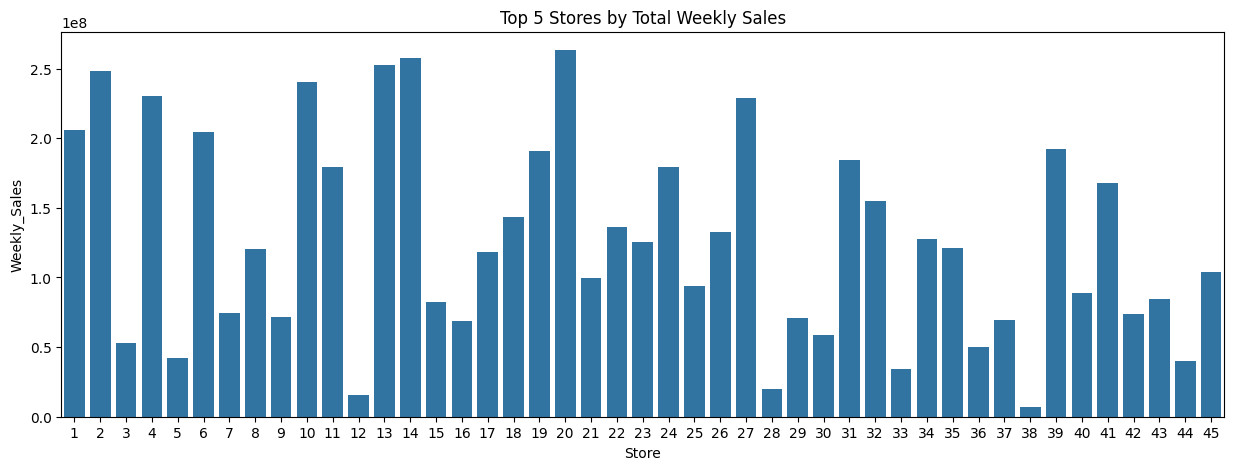

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_performance, x='Store', y='Weekly_Sales')
plt.title("Top 5 Stores by Total Weekly Sales")
plt.show()

**f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.**

In [ ]:
worst = top_performance.sort_values(by = 'Weekly_Sales' , ascending=True)

In [ ]:
worst.head(1)

,Store,Weekly_Sales
37,38,6857104.07


In [ ]:
best = top_performance.sort_values(by = 'Weekly_Sales' , ascending=False)

In [ ]:
best.head(1)

,Store,Weekly_Sales
19,20,2.632513e+08


In [ ]:
perform = best['Weekly_Sales'].max()
perform

263251251.29

In [ ]:
perform2 = worst['Weekly_Sales'].min()
perform2

6857104.07

In [ ]:
diff = perform - perform2
diff

256394147.22

In [ ]:
print('Top Store Sales:', perform)
print('Worst Store Sales:', perform2)
print('Difference in Sales:', diff)

Top Store Sales: 263251251.29
Worst Store Sales: 6857104.07
Difference in Sales: 256394147.22


In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


# **Forecasting the sales for each store for the next 12 weeks**

In [ ]:
df1 = pd.read_csv('/content/Walmart.csv')

In [ ]:
sales = df.groupby(by = 'Date').sum()['Weekly_Sales'].reset_index()
sales

,Date,Weekly_Sales
0,2010-02-05,46619845.70
1,2010-02-19,45363033.79
2,2010-02-26,41043557.90
3,2010-03-05,43813776.69
4,2010-03-12,43270901.25
...,...,...
128,2012-09-28,39468648.67
129,2012-10-05,42823075.29
130,2012-10-12,41600039.67
131,2012-10-19,40743817.45


In [ ]:
sales.set_index('Date' , inplace=True)

In [ ]:
sales

,Weekly_Sales
Date,
2010-02-05,46619845.70
2010-02-19,45363033.79
2010-02-26,41043557.90
2010-03-05,43813776.69
2010-03-12,43270901.25
...,...
2012-09-28,39468648.67
2012-10-05,42823075.29
2012-10-12,41600039.67


<Figure size 1500x1500 with 0 Axes>

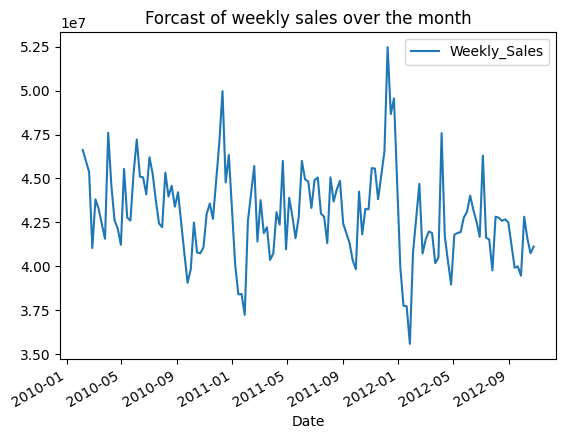

In [ ]:
plt.figure(figsize=(15,15))
sales.plot()
plt.title('Forcast of weekly sales over the month')
plt.show()

In [ ]:
df['Weekly_Sales'].dtype

dtype('float64')

Figure(640x480)


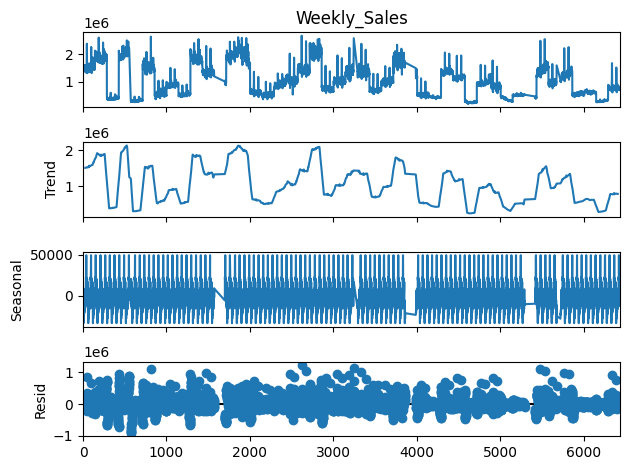

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['Weekly_Sales'] , period = 52)
print(decompose.plot())

In [ ]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(sales)

In [ ]:
p_val = test_result[1]
p_val

np.float64(0.0009005991340074048)

In [ ]:
if p_val < 0.05:
  print('Data is Stationary')
else:
  print('Data is not stationary')

Data is Stationary


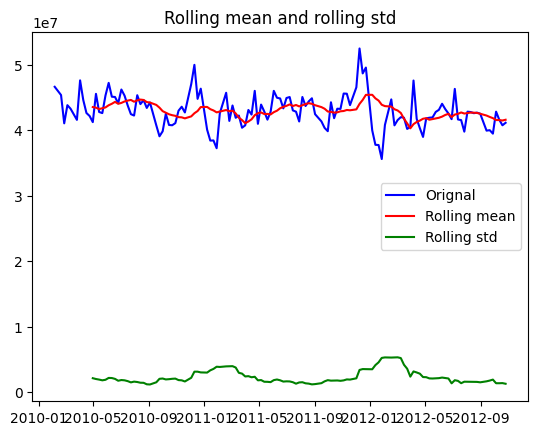

In [ ]:
rolling_mean = sales.rolling(window=12).mean()
rolling_std = sales.rolling(window=12).std()

plt.plot(sales , color='blue' , label = 'Orignal')
plt.plot(rolling_mean , color='red' , label = 'Rolling mean')
plt.plot(rolling_std , color='green' , label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling mean and rolling std')
plt.show()

In [ ]:
sales

,Weekly_Sales
Date,
2010-02-05,46619845.70
2010-02-19,45363033.79
2010-02-26,41043557.90
2010-03-05,43813776.69
2010-03-12,43270901.25
...,...
2012-09-28,39468648.67
2012-10-05,42823075.29
2012-10-12,41600039.67


# **Model Building**

In [ ]:
sales

,Weekly_Sales
Date,
2010-02-05,46619845.70
2010-02-19,45363033.79
2010-02-26,41043557.90
2010-03-05,43813776.69
2010-03-12,43270901.25
...,...
2012-09-28,39468648.67
2012-10-05,42823075.29
2012-10-12,41600039.67


In [ ]:
sales.shape

(133, 1)

In [ ]:
print(sales.columns)

Index(['Weekly_Sales'], dtype='object')


In [ ]:
train = sales.iloc[:120]['Weekly_Sales']
test = sales.iloc[120:]['Weekly_Sales']

In [ ]:
print(sales.columns)

Index(['Weekly_Sales'], dtype='object')


In [ ]:
train.shape

(120,)

In [ ]:
test.shape

(13,)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import *

In [1]:
import itertools

p = range(0 , 6)
d = range(0,1)
q = range(0 , 6)

pdq = list(itertools.product(p,d,q))
rmse = []
order = []

for i in pdq:
  model = ARIMA(train , order = i)
  model_fit = model.fit()
  model_pred = model_fit.predict(start = len(train) , end = len(train) + len(test) - 1)
  error = np.sqrt(mean_squared_error(test , model_pred))
  order.append(i)
  rmse.append(error)
  result = pd.DataFrame(index = order , data = rmse ,columns = ['RMSE'])

NameError: name 'ARIMA' is not defined

In [ ]:
result.sort_values(by = 'RMSE' , ascending = True)

,RMSE
"(2, 0, 5)",1.882220e+06
"(2, 0, 4)",1.885120e+06
"(3, 0, 3)",1.891426e+06
"(3, 0, 4)",1.895250e+06
"(3, 0, 5)",1.899281e+06
"(4, 0, 5)",1.899715e+06
"(2, 0, 3)",1.905330e+06
"(5, 0, 5)",1.923234e+06
"(0, 0, 2)",1.923530e+06
"(0, 0, 5)",1.936288e+06


In [ ]:
A_model = ARIMA(train, order = (2, 0, 5))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
A_model = A_model.fit()

In [ ]:
arima_forecast = A_model.predict(start = len(train) , end = len(train) + len(test) - 1)

arima_forecast.index = test.index
sales.loc[test.index, 'ARIMA_prediction'] = arima_forecast


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
train.shape

(120,)

In [ ]:
test.shape

(13,)

In [ ]:
sales.tail(30)

,Weekly_Sales,ARIMA_prediction
Date,,
2012-03-30,40495365.73,NaN
2012-04-06,47578019.79,NaN
2012-04-13,41729410.82,NaN
2012-04-20,40298750.48,NaN
2012-04-27,38968993.91,NaN
2012-05-04,41797688.43,NaN
2012-05-11,41899750.30,NaN
2012-05-18,41948580.13,NaN
2012-05-25,42782935.44,NaN


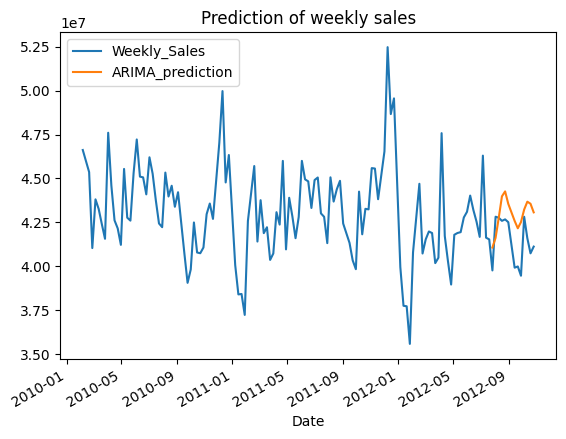

In [ ]:
sales[['Weekly_Sales' , 'ARIMA_prediction']].plot(title = 'Prediction of weekly sales')
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
S_model = SARIMAX(train , order = (2, 0, 5) , seasonal_order = (2, 0, 5 , 12))
S_model = S_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

In [ ]:
sarima_forecast = S_model.predict(start = len(train),end = len(train) + len(test) - 1)

sarima_forecast.index = test.index

sales.loc[test.index, 'SARIMA_predictions'] = sarima_forecast

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
sales

,Weekly_Sales,ARIMA_prediction,SARIMA_predictions
Date,,,
2010-02-05,46619845.70,NaN,NaN
2010-02-19,45363033.79,NaN,NaN
2010-02-26,41043557.90,NaN,NaN
2010-03-05,43813776.69,NaN,NaN
2010-03-12,43270901.25,NaN,NaN
...,...,...,...
2012-09-28,39468648.67,4.252216e+07,4.165860e+07
2012-10-05,42823075.29,4.323398e+07,4.285208e+07
2012-10-12,41600039.67,4.368147e+07,4.274626e+07


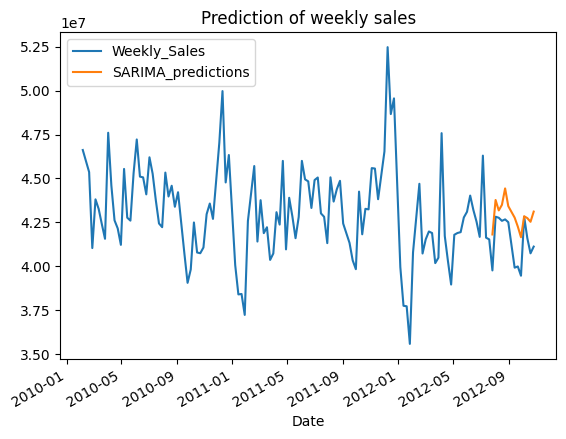

In [ ]:
sales[['Weekly_Sales' , 'SARIMA_predictions']].plot(title = 'Prediction of weekly sales')
plt.show()

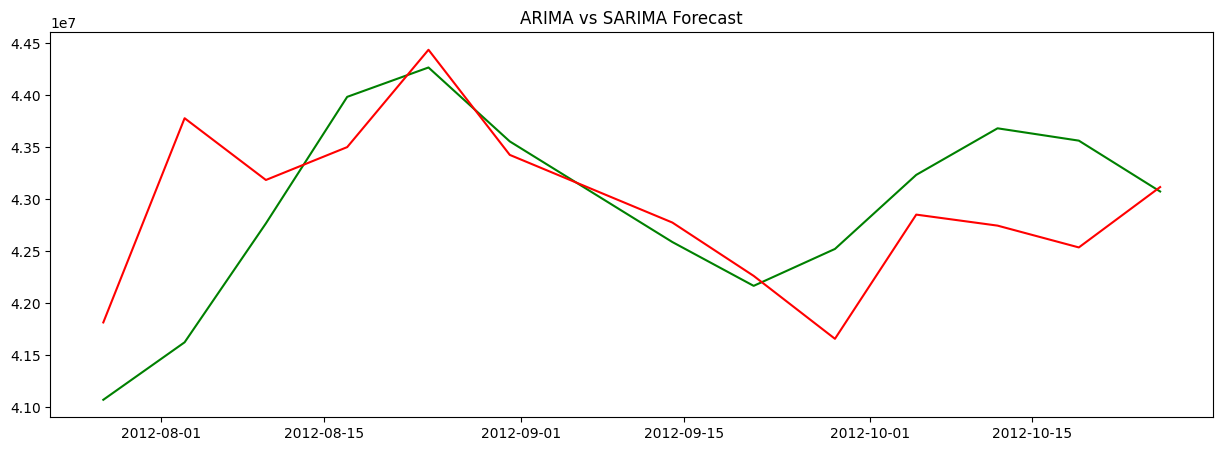

In [ ]:
plt.figure(figsize=(15,5))
plt.plot( sales.loc[test.index,'ARIMA_prediction'] , label='ARIMA', color='green')
plt.plot( sales.loc[test.index,'SARIMA_predictions'] , label='SARIMA', color='red')
plt.title("ARIMA vs SARIMA Forecast")
plt.show()

In [ ]:
import statsmodels.api as sm

print("AIC of SARIMA:", S_model.aic)
print("BIC of SARIMA:", S_model.bic)

AIC of SARIMA: 3875.5147041074647
BIC of SARIMA: 3917.327080249195


In [ ]:
print("AIC of ARIMA:", A_model.aic)
print("BIC of ARIMA:", A_model.bic)

AIC of ARIMA: 3861.6256437102893
BIC of ARIMA: 3886.7130693953277


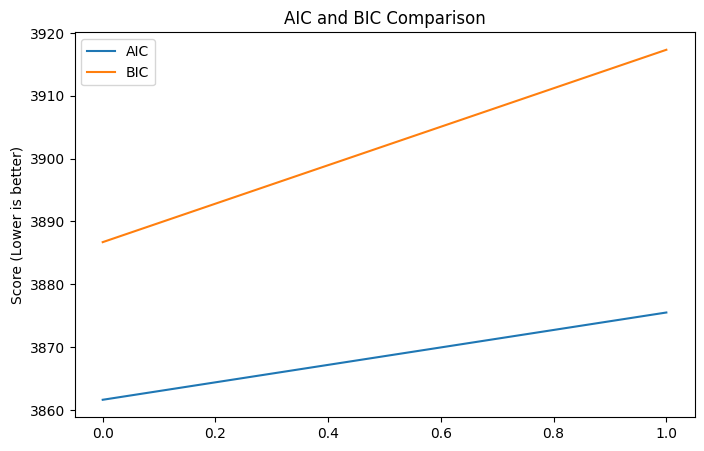

In [ ]:
plt.figure(figsize=(8,5))
plt.plot([A_model.aic, S_model.aic] , label='AIC')
plt.plot([A_model.bic, S_model.bic] , label='BIC')
plt.title("AIC and BIC Comparison")
plt.ylabel("Score (Lower is better)")
plt.legend()
plt.show()